In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.Path().resolve().parent))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from utils.preprocessor import Preprocessor
from utils.data_loader import DataLoader

In [3]:
df = DataLoader.fetch_data("^N225", interval="1d", start="2006-08-31", end="2021-08-31")
df = df[df["Volume"] != 0]
df_train = df[:len(df)//2]
df_test = df[len(df)//2:]
print(df.head())

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close     Volume
Date                                                                         
2006-08-31  15884.610352  16207.410156  15882.259766  16140.759766  112200000
2006-09-01  16072.809570  16158.480469  16029.559570  16134.250000  100200000
2006-09-04  16280.179688  16414.939453  16280.179688  16358.070312  109100000
2006-09-05  16357.290039  16403.900391  16280.679688  16385.960938  109300000
2006-09-06  16350.269531  16400.710938  16245.160156  16284.089844  126000000


In [4]:
features_train = Preprocessor.extract_features(df_train)
features_test = Preprocessor.extract_features(df_test)

df_train, features_train = Preprocessor.align_date(df_train, features_train)
df_test, features_test = Preprocessor.align_date(df_test, features_test)

scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
# features_train = pd.DataFrame(scaler.fit_transform(features_train), index=features_train.index, columns=features_train.columns)
# features_test = pd.DataFrame(scaler.transform(features_test), index=features_test.index, columns=features_test.columns)

df_train = df_train.drop(["Open", "High", "Low"], axis=1)
df_test = df_test.drop(["Open", "High", "Low"], axis=1)

In [5]:
data_train = pd.concat([df_train, features_train], axis=1)
data_test = pd.concat([df_test, features_test], axis=1)

data_train = pd.DataFrame(scaler.fit_transform(data_train), index=data_train.index, columns=data_train.columns)
data_test = pd.DataFrame(scaler.transform(data_test), index=data_test.index, columns=data_train.columns)


In [6]:
data_test

,Close,Volume,log_return,log_volume_diff,ADX,MACD Hist,StochRSI,MFI
Date,,,,,,,,
2014-04-11,0.737003,0.475830,-1.394243,1.601507,-0.406839,-1.125626,-1.539952,0.047495
2014-04-14,0.720596,-0.580901,-0.204262,-1.937219,-0.220671,-1.450438,-0.777121,0.171366
2014-04-15,0.749092,-0.584837,0.364357,-0.009880,-0.103926,-1.477846,0.048305,0.091295
2014-04-16,0.887503,-0.136169,1.724388,0.910233,-0.172138,-0.963144,1.203759,0.028500
2014-04-17,0.887454,-0.445120,0.003076,-0.611492,-0.273582,-0.575400,1.642590,-0.012511
...,...,...,...,...,...,...,...,...
2021-08-24,5.266177,-1.838352,0.504011,0.026609,0.083821,0.155949,1.599726,0.279122
2021-08-25,5.263777,-1.948551,-0.011611,-0.545280,-0.036804,0.462457,2.524773,0.789581
2021-08-26,5.269528,-2.007587,0.040304,-0.317535,-0.148814,0.678008,1.457838,0.351795


0 0 Close
0 1 Volume
0 2 log_return
0 3 log_volume_diff
1 0 ADX
1 1 MACD Hist
1 2 StochRSI
1 3 MFI


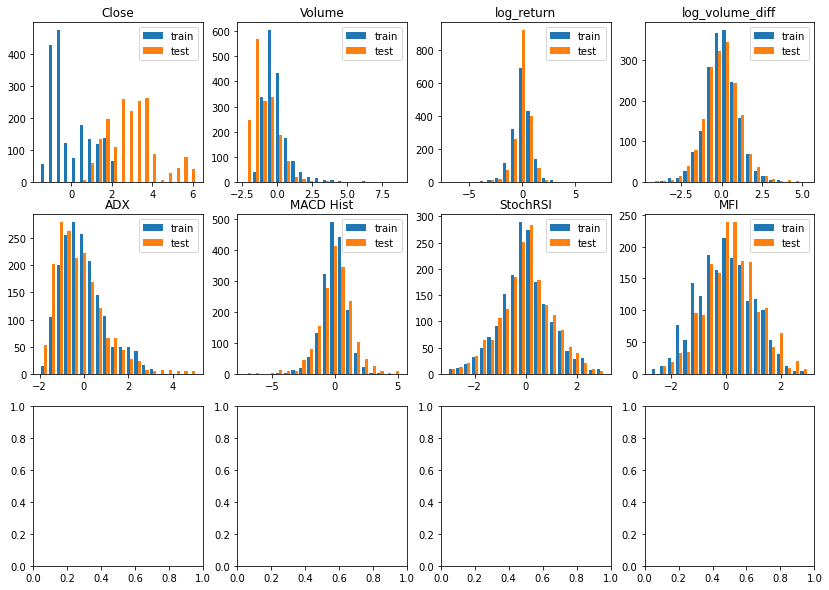

In [7]:
columns = data_train.columns.tolist()
fig, axes = plt.subplots(3, len(columns) // 2, figsize=(14, 10))
i, j = 0, 0
for column in columns:
    print(i, j, column)
    axes[i, j].hist([data_train[column], data_test[column]], bins=20, label=["train", "test"])
    axes[i, j].set_title(column)
    axes[i, j].legend()
    j += 1
    j %= len(columns) // 2
    if j == 0:
        i += 1